# DADOS QUANTITATIVOS DISCRETOS

In [30]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

tabela = 'dataset/quantitativos/velocidade_internet.csv'
#tabela = 'dataset/quantitativos/cotacao_dolar.csv'
coluna = 'velocidade'
#coluna = 'cotacao'

dataset = pd.read_csv(tabela)
dataset = dataset[coluna]
#data_ordenado = data.sort_values()
#data_ordenado

# Usando pandas para criar a series de numeros
#data = dataset['velocidade']
ordenados = sorted(dataset)
#print(ordenados)
data = pd.Series(ordenados)
#data

# Montando a tabela de distribuição de frequência

#math.ceil arrendonda arredonda para o número inteiro mais próximo em direção ao infinito positivo
tamanho = len(data)
valor_minimo = min(data)
qnt_classe = math.ceil(math.sqrt(tamanho))

amplitude = data.max() - data.min()
intervalo = round(amplitude / qnt_classe,2)

# Intervalos
inicial = valor_minimo
s = valor_minimo

#Meu Proprio intervalo para recorte dos dados
intervalos = []
for i in range(qnt_classe + 1):
    intervalos.append(inicial)
    inicial+= intervalo

print("Quantidade de classes: " , qnt_classe)
print("Intervalo: ", intervalo)

df = pd.DataFrame(data,columns=['Classes'])
#df

s, bins = pd.cut(pd.Series(df['Classes']), bins = qnt_classe, retbins=True)
#print(factor)

ponto_medio = [(a + b) /2 for a,b in zip(bins[:-1], bins[1:])]
#print(ponto_medio)

#lista_interval = list(interval[1:])
#print(lista_interval)

#Agrupando dados para contagem
factor = pd.cut(df['Classes'],bins=qnt_classe)
#frequencia = pd.value_counts(factor)
frequencia = df.groupby(factor)['Classes'].agg(['count'])
#print(frequencia)

#Salvando tabela inicial
frequencia.to_csv('dataset_gerados/tabela_teste2.csv')
dataset_df = pd.read_csv('dataset_gerados/tabela_teste2.csv')

# Calculando a frequencia acumulada
frequencia = dataset_df['count']
#freq_acumulada = []
#fa = 0
#for i in range(0,len(frequencia)):
#    fa += frequencia[i]
#    freq_acumulada.append(fa);    

dataset_df.rename(columns={'count':'F'}, inplace=True)
#dataset_df['FA'] = freq_acumulada
dataset_df['FA'] = dataset_df['F'].cumsum ()
#print(dataset_df)

# Calcular a frequencia relativa
total = sum(frequencia)
dataset_df['FR %'] = dataset_df['F'] / total
#dataset_df

#Calcular a frequencia relativa acumulada
#frequencia = dataset_df['FR %']
#freq_relativa_acumulada = []
#fra = 0
#for i in range(0,len(frequencia)):
#    fra += frequencia[i]
#    freq_relativa_acumulada.append(fra);    

#dataset_df['FRA %'] = freq_relativa_acumulada
#dataset_df

# Ponto médio
xi = []
s = 0
for i in range(qnt_classe):
    xi.append(intervalos[i])

dataset_df['XI'] = xi + (intervalo / 2)
#dataset_df

# Frequencia acumulada do ponto médio
frequencia = dataset_df['XI']
freq_ponto_medio = []
fxi = 0
for i in range(0,len(frequencia)):
    fxi += frequencia[i]
    freq_ponto_medio.append(fxi);    

dataset_df['F.XI'] = freq_ponto_medio
#dataset_df

# Ponto Médio ao quadrado
dataset_df['XI2'] = dataset_df['XI'] ** 2 
#dataset_df

# Frequencia do Ponto Médio ao quadrado
frequencia = dataset_df['XI2']
freq_ponto_medio_quadrado = []
fxi2 = 0
for i in range(0,len(frequencia)):
    fxi2 += frequencia[i]
    freq_ponto_medio_quadrado.append(fxi2); 
dataset_df['F.XI2'] = freq_ponto_medio_quadrado

# XI.LI
dataset_df['XI.LI'] = dataset_df['XI'] * dataset_df['F']

new_df = pd.DataFrame(dataset_df)
new_df

# # Salvando tabela inicial
#new_df.to_csv('dataset_gerados/TOFPC.csv',index=False)
#new_df

Quantidade de classes:  7
Intervalo:  0.81


,Classes,F,FA,FR %,FRA %,XI,F.XI,XI2,F.XI2,XI.LI
0,"(0.624, 1.439]",5,5,0.125,0.125,1.035,1.035,1.071225,1.071225,5.175
1,"(1.439, 2.247]",4,9,0.100,0.225,1.845,2.880,3.404025,4.475250,7.380
2,"(2.247, 3.056]",6,15,0.150,0.375,2.655,5.535,7.049025,11.524275,15.930
3,"(3.056, 3.864]",4,19,0.100,0.475,3.465,9.000,12.006225,23.530500,13.860
4,"(3.864, 4.673]",3,22,0.075,0.550,4.275,13.275,18.275625,41.806125,12.825
5,"(4.673, 5.481]",2,24,0.050,0.600,5.085,18.360,25.857225,67.663350,10.170
6,"(5.481, 6.29]",16,40,0.400,1.000,5.895,24.255,34.751025,102.414375,94.320


# Histograma

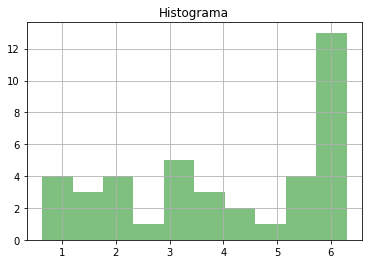

In [31]:
# MATPLOTLIB: Histograma (univariado)
vel_internet = pd.Series(data) # Transformanda os dados em um serie
vel_internet.hist(alpha=0.5, color='Green')
plt.title("Histograma")
plt.show()

# Calculos da Tabela

In [32]:
import math
# Media
f = new_df['F'].sum() 
xi_li = new_df['XI.LI'].sum()
media = xi_li / f

# Moda
repeticao = new_df['F'].max()
#moda = new_df[repeticao]
print("Maior repetição: ", repeticao)
index = new_df['F'].iloc()
print("Indice", index)
#print("Valor que mais se repete: ",repeticao)

# Mediana
#print("Mediana")

# Variancia
fxi = new_df['F.XI'].sum()
fixi2 = new_df['F.XI2'].sum()
variancia = (1/ (f-1)) * (fixi2 - ((fxi **2) / f))
#print("FXI: ", fxi)
#print("FXI2: ", fixi2)
#print("F: ", f)

# Desvio Padrão
desvio_padrao = math.sqrt(variancia)

#new_df.reindex[new_df['F']]

# Coeficiente de variação
coeficiente_variacao = (desvio_padrao /  media) * 100

descritiva_tabela = pd.DataFrame({'Medidas': ["Média", "Moda","Mediana",
                                           "1° Quartil","2° Quartil","3° Quartil",
                                           "Variancia","Desvio Padrão","Coeficiente de Variação"],
                        
                       'Resultado': [media, 
                                     0,
                                     0,
                                     0,                                    
                                     0,
                                     0,
                                     variancia,
                                     desvio_padrao,
                                     coeficiente_variacao,
                                    ]})
#descritiva_tabela

Maior repetição:  16
Indice <pandas.core.indexing._iLocIndexer object at 0x7fe3e8dd68d0>


### Calculo de dados brutos

In [13]:
# amplitude, variancia, desvio padrão, coeficiente de variação
import math

# Variancia Populacional
def varianciaPopulacional(data):
    tamanho = len(data)
    media = data.mean()
    soma = 0
    
    for valor in data:
        soma += math.pow( (valor - media ), 2)
     
    return soma / float(tamanho)


# Variancia Amostral
def varianciaAmostral(data):
    tamanho = len(data)
    somaDados = sum(data)

    soma1 = 0
    soma2 = (math.pow(somaDados, 2)) / tamanho
    
    for valor in dataset:
        soma1 += math.pow((valor),2)
        
    return (soma1 - soma2) / float((tamanho - 1))

def desvioPadrao(data):
    return math.sqrt(data)

media = data.mean()
moda = data.mode()

variancia_populacional = varianciaPopulacional(data)
variancia_amostral = varianciaAmostral(data)

desvio_padrao_amostral = desvioPadrao(variancia_populacional)
desvio_padrao_populacional = desvioPadrao(variancia_amostral)

percentil = np.percentile(data,16)

soma = sum(data)
maximo = max(data)
minimo = min(data)
amplitude = maximo - minimo

descritiva = pd.DataFrame({'Medidas': ["Mínimo", "Máximo", "Média", 
                                       "Moda", "1° Quartil","2° Quartil",
                                       "3° Quartil","Percentil", "Amplitude",
                                       "Variancia (Amostral)","Variancia (Populacional)","Desvio Padrão(Amostral)",
                                         "Desvio Padrão (Populacional)","Coeficiente de Variação"],
                        
                       'Resultado': [data.min(), 
                                     data.max(),
                                     media,
                                     moda,                                    
                                     data.quantile(q=0.25),
                                     data.quantile(q=0.50),
                                     data.quantile(q=0.75),
                                     percentil,
                                     amplitude,
                                     variancia_amostral,
                                     variancia_populacional,
                                     desvio_padrao_amostral,
                                     desvio_padrao_populacional,
                                     (desvio_padrao_amostral / media) * 100                                                                          
                                    ]})

#descritiva
#data.describe()

,Medidas,Resultado
0,Mínimo,0.63
1,Máximo,6.29
2,Média,3.9965
3,Moda,0 2.32 1 2.90 dtype: float64
4,1° Quartil,2.32
5,2° Quartil,4.14
6,3° Quartil,5.8075
7,Percentil,1.6944
8,Amplitude,5.66
9,Variancia (Amostral),3.48498


### Media
A média indica o valor onde estão concetrados os dados de um conjuto de valores, representando um valor
significativo para o mesmo.

### Moda
A moda é o valor que mais se repete dentro de um conjunto

### Mediana
A media é o valor central de um conjunto, ou seja, ela separa a metade superior da metade inferior de uma distribuição

In [96]:
#qnt_filhos_ord = sorted(qnt_filhos)
#centro = tam/2 
#mediana = qnt_filhos_ord[int(centro)] # centro = 8
#print("Mediana: %d " % mediana)
#print("Mediana: %d " % vel_internet.median())

## Medidas de dispersão
São medidas que indicam o quão espalhados estão os dados, ou sua variação. São elas: Amplitude, variância, desvio padrão e desvio absoluto

### Amplitude
#### A = maximo - minimo
A amplitude é a diferença entre o maior e menor valor de um conjunto de dados.

In [12]:
minimo = qnt_acidentes.min()
maximo = qnt_acidentes.max()

print("Máximo: %d Mínimo: %d" % (maximo, minimo) )
print("Amplitude: %d " % (maximo - minimo))

Máximo: 9 Mínimo: 0
Amplitude: 9 


### Variancia 
#### (S²) - Amostral
#### (O²) - Populacional
A variância indica quanto os dados de um conjunto estão afastados de seu valor esperado.

In [8]:
import math

# Variancia Populacional
def varianciaPopulacional(data):
    tamanho = len(data)
    media = data.mean()
    soma = 0
    
    for valor in data:
        soma += math.pow( (valor - media ), 2)
     
    return soma / float(tamanho)


# Variancia Amostral
def varianciaAmostral(data):
    tamanho = len(data)
    somaDados = sum(data)

    soma1 = 0
    soma2 = (math.pow(somaDados, 2)) / tamanho
    
    for valor in dataset:
        soma1 += math.pow((valor),2)
        
    return (soma1 - soma2) / float((tamanho - 1))
    
#print("Variancia Populacional: ", varianciaPopulacional(data1))
print("Variancia Amostral: ", varianciaAmostral(data1)) # 4,75


NameError: name 'data1' is not defined

### Desvio Padrão
É a raiz quadrada da variância

In [11]:
def desvioPadrao(data):
    return math.sqrt(data)

print("Desvio padrão Amostral: ", desvioPadrao(varianciaPopulacional(data1)))
print("Desvio padrão Populacional: ", desvioPadrao(varianciaAmostral(data2)))

NameError: name 'data1' is not defined

### Coeficiente de Variação

In [85]:
print("Populacional: ", (data1.std()/data1.mean())*100)
print("Amostral: ", (data2.std()/data2.mean())*100)

Populacional:  66.35303802690034
Amostral:  47.11241731475677


### Mediana da tabela

m/2 = 40/2 = 20º e 21º

Essas posições estão respectivamente na 4º e 5º classes

#### hi = Li - li 
-> hi - 4 - 3 = 1

h- = Amplitude da classe i
Li = Limite superior na classe i
li = Limite inferior da classe i


hi/li = 1/5 = 0,2

#### PMQ - FANT 
-> 20 - 15 = 5

Pmq = Posição da mediana
Fant = Frequência acumulada anterior

### Para a posição 21º
MQ = lit(0,2) * 5 
-> 3 + 1 = 4
    
#### MQ = li + hi *(PMQ - Fant) / hi

### Para a posição 21º
MQ = 4 + 1 * (21 -20) / 3
MQ = 4 + 1 * 1 / 3
MQ = 4 + 1 / 3

= 4,33


### Quartil - Divide em quatro partes iguais


m/4 = 40/4 = 10º posição(q1)

esta na classe 3º posição

#### 1º Quartil = q1 = li + hi(Pq1 - Fant)/li
2 + 1*(10-7)/8

2+3/8 = 2,38

#### 3º Quartil = q3 = li + hi(Pq3 - Fant)/li
5 + 1 * (30 -23)/13
5 + 7/13
= 5,54


### Percentil
p72
#### m / 100
40/100 = 0,4 * 72 = 28,8 POSIÇÃO
está na 6º classe da tabela

p72 = li + hi(Pq - Fant)/fi

= 5 + 1*(28,8 - 23)/13
= 5+ 5,8/13 = 5,45